
# TMDB Inestigation.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

I have selected the TMDB data for my analysis. I will be exploring the data based on the movie genres. 

Some quesions that I would like to ask are,

    1. Which genre is the most profitable and which is the least?
    2. How many movies in each genre got a rating of more than 7?
    3. How has the profit been affected over the years?


In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
# 1.Data Wrangling



## 1.1 Investigating the data


In [2]:
# Reading csv into Pandas Dataframe and store in dataset variable
dframe = pd.read_csv('tmdb-movies.csv')

In [3]:
dframe.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
#Finding out the number of rows and columns
dframe.shape

(10866, 21)

In [5]:
#Printing out information about the data
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

After printing out the information about the dataset, we see that values are missing for, homepage,director,tagline,keywords,production_companies,overview,cast,imdb_id,genre. 
For our investigation, we do not need the imdb_id,cast,homepage,director,tagline,overview,release_date(as we already have a column with release year),production_company,budget_adj,revenue_adj,keywords columns
For the remaining columns I will need to find a way tp update the values.

In [6]:
#Finding the datatypes of each column
dframe.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
dframe.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [8]:
dframe.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# 2. Data Cleaning

## 2.1 Removing the unwanted columns

For our investigation, we do not need the imdb_id,cast,homepage,director,tagline,overview,release_date(as we already have a column with release year),production_company,budget_adj,revenue_adj,keywords columns. So I will be dropping those columns now.

In [9]:
#Dropping the unwanted columns
dframe=dframe.drop(['imdb_id','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','production_companies', 'release_date','budget_adj',
       'revenue_adj'], axis=1)
dframe.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


## 2.2 Handling the missing values

We see that, there are missing values in the budget,revenue and runtime columns. I will be replacing these columns with the mean.

In [10]:
# mean value of budget
mean_budget = dframe['budget'].mean(skipna=True)
mean_budget

14625701.09414688

In [11]:
# mean value of revenue
mean_revenue = dframe['revenue'].mean(skipna=True)
mean_revenue

39823319.79339223

In [12]:
# mean value of runtime
mean_runtime = dframe['runtime'].mean(skipna=True)
mean_runtime

102.07086324314375

In [13]:
# Replacing the budget nulls with the mean

dframe['budget']=dframe.budget.mask(dframe.budget == 0,mean_budget)
dframe.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,2.229255e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,2.801245e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,1.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,1.462570e+07,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,1.462570e+07,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [14]:
# Replacing the revenue nulls with the mean

dframe['revenue']=dframe.revenue.mask(dframe.revenue == 0,mean_revenue)
dframe.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,2.229255e+07,6.187164e+07,102.070863,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,2.801245e+07,1.110204e+08,31.381405,575.619058,0.935142,12.812941
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,1.462570e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,1.462570e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [15]:
# Replacing the runtime nulls with the mean

dframe['runtime']=dframe.runtime.mask(dframe.runtime == 0,mean_runtime)
dframe.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000
mean,66064.177434,0.646441,2.229255e+07,6.187164e+07,102.362065,217.389748,5.974922,2001.322658
std,92130.136561,1.000185,2.801245e+07,1.110204e+08,30.902781,575.619058,0.935142,12.812941
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000
25%,10596.250000,0.207583,1.462570e+07,3.982332e+07,90.000000,17.000000,5.400000,1995.000000
50%,20669.000000,0.383856,1.462570e+07,3.982332e+07,99.000000,38.000000,6.000000,2006.000000
75%,75610.000000,0.713817,1.500000e+07,3.982332e+07,111.000000,145.750000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


In [16]:
#Analysing the new dataset
dframe.shape

(10866, 10)

In [17]:
##Printing out information about the data
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null float64
revenue           10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null float64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(5), int64(3), object(2)
memory usage: 849.0+ KB


In [18]:
#Printing a few columns
dframe.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137.0,Action|Crime|Thriller,2947,7.3,2015


In [19]:
#Splitting the genres

s = dframe['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genres'
del dframe['genres']
df = dframe.join(s)

In [20]:
#Printing a few columns to check if the split occurred
df.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,genres
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Action
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Adventure
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Science Fiction
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Thriller
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,Action


In [21]:
#Information about the new dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26983 entries, 0 to 10865
Data columns (total 10 columns):
id                26983 non-null int64
popularity        26983 non-null float64
budget            26983 non-null float64
revenue           26983 non-null float64
original_title    26983 non-null object
runtime           26983 non-null float64
vote_count        26983 non-null int64
vote_average      26983 non-null float64
release_year      26983 non-null int64
genres            26960 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 2.3+ MB


In [22]:
#Checking the number of new rows and columns
df.shape

(26983, 10)

## 2.3 Checking for NULL values

In [23]:
#Checking if there are any null values
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
runtime            0
vote_count         0
vote_average       0
release_year       0
genres            23
dtype: int64

In [24]:
#Dropping the null values
df=df.dropna(axis=0,how='any')


In [25]:
#Checking to see if there are any more null values
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
vote_count        0
vote_average      0
release_year      0
genres            0
dtype: int64

##### In this new dataset, there are duplicates as I am exploring it based on the Genres and when I had split it based on the Genres values were duplicated

<a id='eda'></a>
# 3. Exploratory Data Analysis




Let us now visualise the data we have with plots

#### 1. Let's see how the votes are distributed

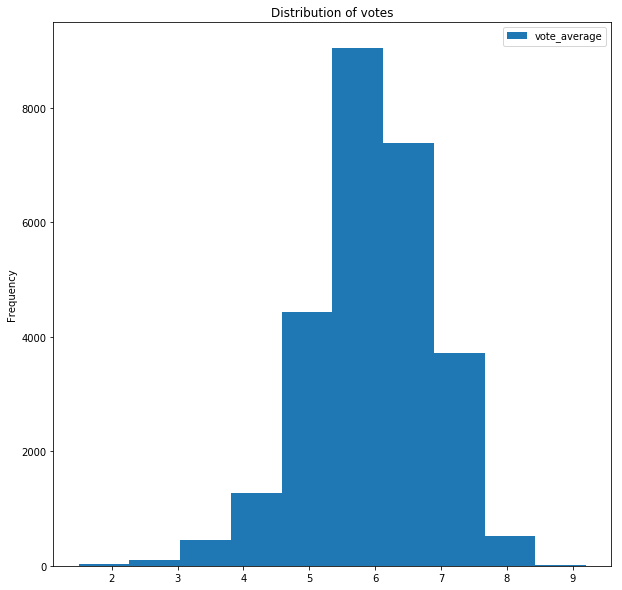

In [26]:
df['vote_average'].plot(kind='hist',title='Distribution of votes',legend=True,figsize=(10,10));

We see that movies with an average vote of 5 or more are more.

#### 2. Now let's check the popularity of the genres

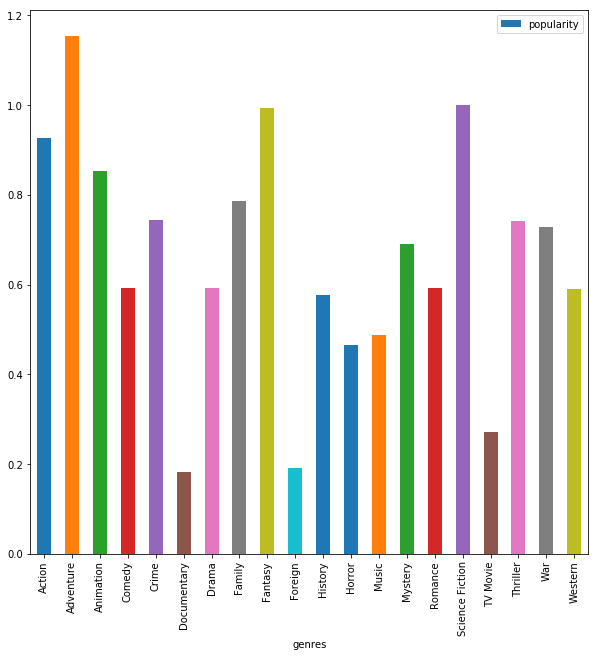

In [27]:
df.groupby('genres')['popularity'].mean().plot.bar(legend=True,figsize=(10,10));

We see that on an average the most popular genre is Adventure and the least is Documentary

#### 3. Let's check the runtimes

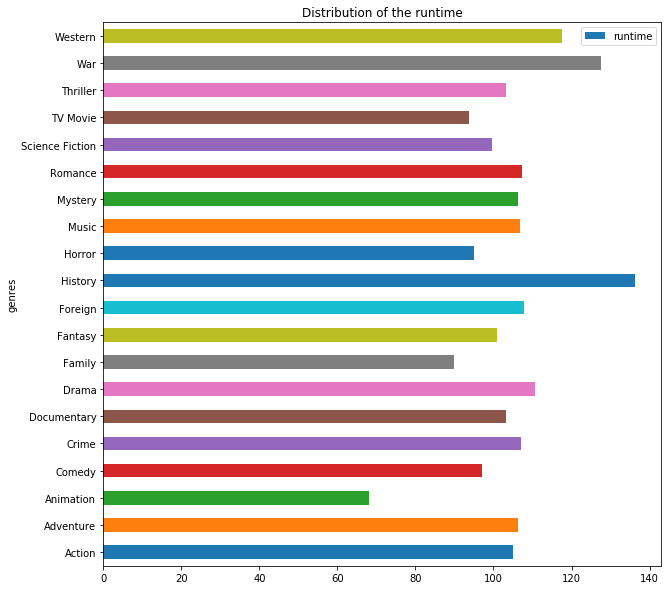

In [28]:
df.groupby('genres')['runtime'].mean().plot(kind='barh',title='Distribution of the runtime',legend=True,figsize=(10,10));

We see that history has the highest runtime

## Question 1: Which genre is the most profitable and which is the least?

In [29]:
df.groupby('genres')['popularity'].mean()

genres
Action             0.926136
Adventure          1.154259
Animation          0.852182
Comedy             0.592607
Crime              0.744821
Documentary        0.181432
Drama              0.591496
Family             0.786668
Fantasy            0.992840
Foreign            0.191496
History            0.575936
Horror             0.465357
Music              0.487321
Mystery            0.690012
Romance            0.592082
Science Fiction    1.001218
TV Movie           0.270896
Thriller           0.741513
War                0.727683
Western            0.590615
Name: popularity, dtype: float64

In [30]:
#Let's add a new column called profit to the dataframe. Let's calculate it based on revenue and budget.

df['profit']=df['revenue']-df['budget']

In [31]:
#let's check if the new column is added or not.
df.head()

,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,genres,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Action,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Adventure,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Science Fiction,1.363529e+09
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Thriller,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,Action,2.284364e+08


We see that a new column called profit is added at the end.

In [32]:
#Now, let us group the profit by genre
df.groupby('genres')['profit'].mean()

genres
Action             5.794118e+07
Adventure          8.697794e+07
Animation          6.923175e+07
Comedy             3.754132e+07
Crime              3.600919e+07
Documentary        2.065017e+07
Drama              3.062799e+07
Family             6.388956e+07
Fantasy            7.696780e+07
Foreign            2.142290e+07
History            2.838556e+07
Horror             2.898130e+07
Music              3.223421e+07
Mystery            3.708326e+07
Romance            3.531374e+07
Science Fiction    5.964741e+07
TV Movie           2.573120e+07
Thriller           3.845749e+07
War                4.010050e+07
Western            2.566365e+07
Name: profit, dtype: float64

We see that the profits are not easily readable. Let's convert the profit in terms of millions.

In [33]:
#We divide by a million
df['profit']=df['profit']/1000000

In [34]:
#Let's check the dataframe now
df.head()


,id,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,genres,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Action,1363.528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Adventure,1363.528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Science Fiction,1363.528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,5562,6.5,2015,Thriller,1363.528810
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,6185,7.1,2015,Action,228.436354


#### I will be further dividing the dataset and using only those columns as needed to answer the questions as it will make it faster and easier to run and analyse

In [35]:
# I need  the profit and genre columns to answer this question.
df1=df[['original_title', 'profit','genres']]
df1.head()

,original_title,profit,genres
0,Jurassic World,1363.528810,Action
0,Jurassic World,1363.528810,Adventure
0,Jurassic World,1363.528810,Science Fiction
0,Jurassic World,1363.528810,Thriller
1,Mad Max: Fury Road,228.436354,Action


Now it is much easier to view and analyse.  Now, lets visualize and find the answers to the quesion.

In [36]:
#Finding out the mean and grouping by genre
df2 = df1.groupby(['genres']).mean()
df2

,profit
genres,
Action,57.941185
Adventure,86.977935
Animation,69.231747
Comedy,37.541321
Crime,36.009188
Documentary,20.650165
Drama,30.627987
Family,63.889556
Fantasy,76.967801


In [37]:
#Sorting the values
df2.sort_values('profit', ascending=False, inplace = True )

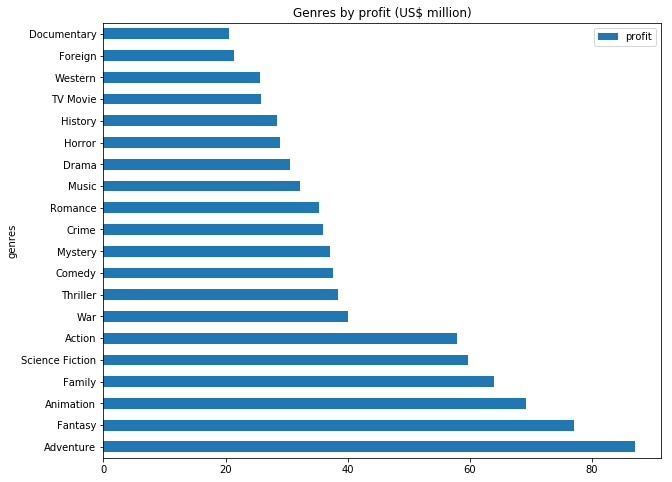

In [38]:
#Plotting the graph
df2[['profit']].plot.barh(stacked=True, title = 'Genres by profit (US$ million)', figsize=(10, 8));

From the plot, we see that the Adventure is most profitable and the least profitable genre is Documentary.

## Question 2: How many movies in each genre got a rating of more than 7?

In [39]:
#Finding out the ratings above 7
df3 = df[df['vote_average']>=7]   

In [40]:
df3.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,3499.000000,3499.000000,3.499000e+03,3.499000e+03,3499.000000,3499.000000,3499.000000,3499.000000,3499.000000
mean,69146.905687,1.320401,2.759599e+07,1.176203e+08,108.682868,698.793084,7.328865,1999.383538,90.024275
std,99430.682598,2.134683,3.992433e+07,2.336771e+08,52.198606,1278.841683,0.312080,14.672539,202.773750
min,11.000000,0.001315,3.000000e+00,3.000000e+00,2.000000,10.000000,7.000000,1960.000000,-80.176680
25%,4808.000000,0.232113,1.462570e+07,3.982332e+07,91.000000,26.000000,7.100000,1991.000000,25.197619
50%,16769.000000,0.563653,1.462570e+07,3.982332e+07,106.000000,108.000000,7.200000,2005.000000,25.197619
75%,84288.000000,1.520387,2.000000e+07,7.277118e+07,125.000000,711.000000,7.500000,2011.000000,52.252875
max,414419.000000,28.419936,2.800000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2544.505847


In [41]:
# I need the genre and vote_average columns
df4=df3[['vote_average','genres','original_title']]
df4.head()

,vote_average,genres,original_title
1,7.1,Action,Mad Max: Fury Road
1,7.1,Adventure,Mad Max: Fury Road
1,7.1,Science Fiction,Mad Max: Fury Road
1,7.1,Thriller,Mad Max: Fury Road
3,7.5,Action,Star Wars: The Force Awakens


In [42]:
#Sorting the values
df5 = (pd.DataFrame(df4.groupby('genres').original_title.nunique())).sort_values('original_title', ascending=False )
df5

,original_title
genres,
Drama,775
Comedy,385
Documentary,268
Action,231
Thriller,230
Crime,206
Adventure,189
Romance,172
Animation,171


In [43]:
df5.describe()

,original_title
count,20.000000
mean,174.450000
std,169.123585
min,21.000000
25%,67.500000
50%,142.000000
75%,212.000000
max,775.000000


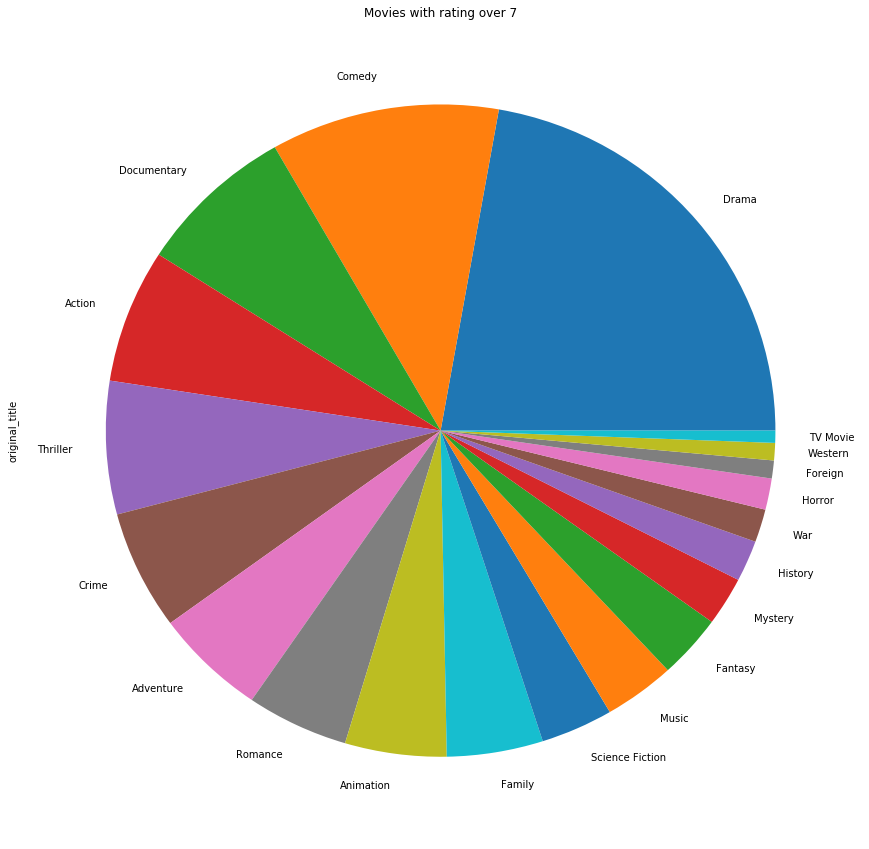

In [44]:
# Plotting a pie chart
df5['original_title'].plot(kind='pie',figsize=(15,15),title = 'Movies with rating over 7');

From the pie cart, we see that Drama has 775 movies rated above 7 where as TV movie has the least with 21.

## Question 3: How has the profit been affected over the years?

In [45]:
# I need the profit and the release_year
df7=df[['release_year','profit','original_title']]
df7.head()

,release_year,profit,original_title
0,2015,1363.528810,Jurassic World
0,2015,1363.528810,Jurassic World
0,2015,1363.528810,Jurassic World
0,2015,1363.528810,Jurassic World
1,2015,228.436354,Mad Max: Fury Road


In [46]:
#Grouping by year and taking the average
df8=df7.groupby(['release_year']).mean()

In [47]:
df8

,profit
release_year,
1960,24.532848
1961,32.759595
1962,27.368369
1963,25.090874
1964,29.817108
1965,38.099678
1966,25.369584
1967,34.872711
1968,23.447142


Text(0.5,1,'Profits over decades (US$ million)')

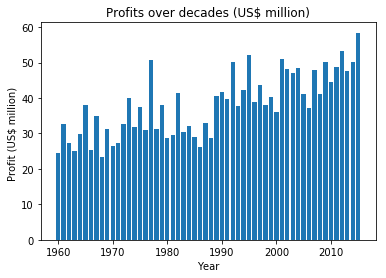

In [48]:
#Plotting the graph
plt.xlabel('Year',fontsize=10)
plt.ylabel('Profit (US$ million) ',fontsize=10)

plt.bar(df8.index,df8['profit']);
plt.title('Profits over decades (US$ million)')


We see that the profit has increased over the years.

<a id='conclusions'></a>
## Conclusions

### 6.1 Limitations of dataset
The are a number of limitations with the TMDB, which are caused by:

    -missing data
    -restrictd to this is only a sample dataset
    -missing other feature that would be interesting for analysis

There is a lot of data missing for the budget,revenue and runtime for which I had to adjust the dataset by taking the mean of each column and appending the mean to the missing rows. Although this helped improve the data, it was not a correct representation of the actual budget,revenue or the runtime of the movies.

The number of movies released each year are far greater than the scope of this dataset. This data could be random sample or it could be biased to a specific genre or could be unbiased.

We see that there is a vote count and vote average, if we were to have other columns that would say if the voters were the critics or the general public, it would have been easier to see if the movie was popular with the masses or if it was a critically accalimed movie.

### 6.2 Answering the questions
I had asked the following questions at the beginning.

    1. Which genre is the most profitable and which is the least?
    2. How many movies in each genre got a rating of more than 7?
    3. How has the profit been affected over the years?

    Ans 1: From the plot, we see that the Adventure is most profitable and the least profitable genre is Documentary.

    Ans 2: From the pie cart, we see that Drama has 775 movies rated above 7. This shows that people love watching more of Drama.Also along with Drama,Comedy,Action also have a good number of movies with ratings higher than 7 which indicates that the audience has received the movie well, but its not the same in case of genres like documentary,foreign or TV movie. 

    Ans 3: From the plot, we see that in the 1960s, the mean profit peaked at 30-40 million US dollars. This has significantly imroved in the 2010s where the mean profit is almost 60 million US dollars.